In [7]:
import synloc as s
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

The Local resampler is expected to perform well on convex distributions. Therefore, non-convex distributions which are clustered around different spaces are selected for the simulation purpose. We first simulate the following distribution:
$$
\begin{aligned}
    u_{j,i} &\sim Normal(0, 1),  \\
    x_i &\sim r_i * \cos{a_i} + u_{1,i},\\
    y_i &\sim 0.5 x_i - 0.05 x_i^2 + r_i * \sin{a_i} + u_{2,i},
\end{aligned}
$$

where $r_i$ is 8 or 20 with same probability, and $a_i$ is drawn from a uniform distribution with lower and upper bounds, 0 and $ 2\pi$, respectively. 

We locally estimate multivariate normal distribution with $k=20$ and draw synthetic values from the estimated distributions. 

100%|██████████| 500/500 [00:00<00:00, 776.40it/s]


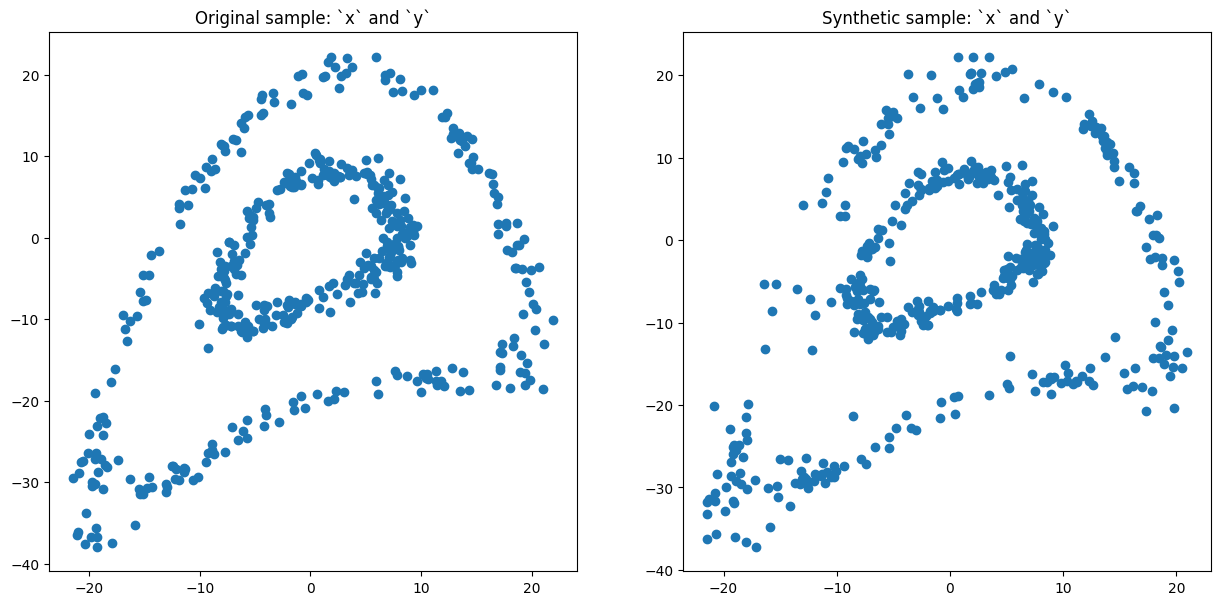

In [6]:
data = s.sample_circulars_xy(500)
syn = s.LocalCov(data, K = 20)
syn.fit()
syn.comparePlots(data.columns.values)

Figure reff shows that noncovex distributions can be replicated quite well with locally estimated distributions, even though synthetic values are drawn from the multivariate normal distribution. Note that, we use $k=20$ to estimate each distribution whereas this is a bivariate sample. It is possible to replicate original sample more accurately with smaller $k$.

The next simulation generates a trivariate sample as follows:

$$
\begin{aligned}
x_i &\sim Beta(0.1,\,0.1),\\
y_i &\sim Beta(0.1,\, 0.5),\\
z_i &\sim 10 * y_i + u_i,
\end{aligned}
$$

where $u_i$ is drawn from a standard normal distribution. Again, we locally estimate multivariate normal distribution with $k=20$ and draw synthetic values from the estimated distributions. 

100%|██████████| 500/500 [00:00<00:00, 744.05it/s]


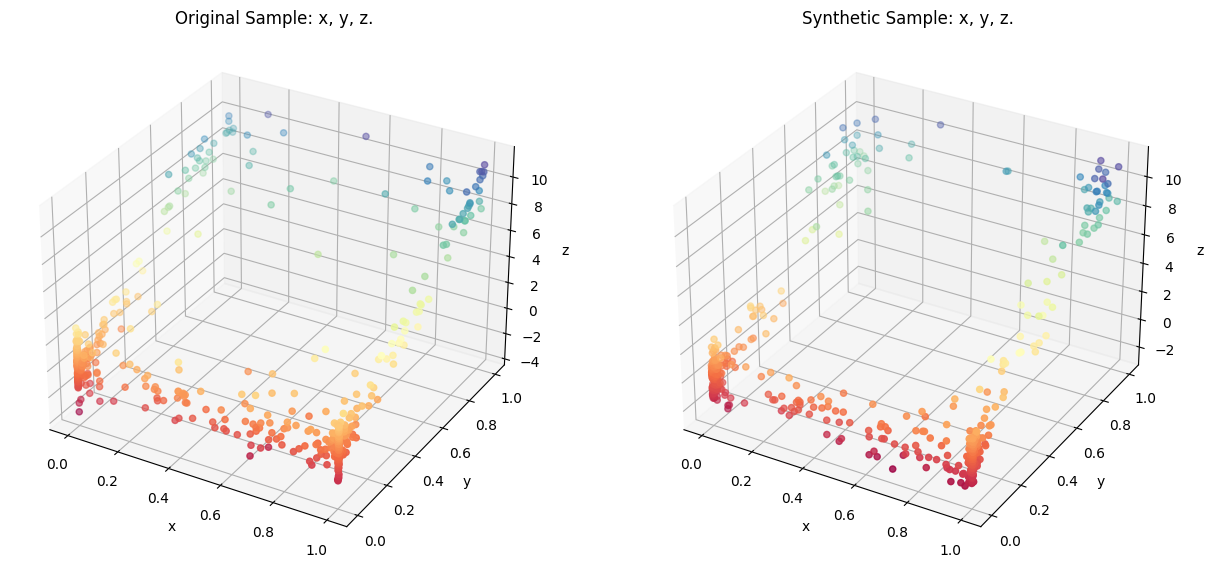

In [9]:
data2 = s.sample_trivariate_xyz(500)
syn2 = s.LocalCov(data2, K = 20)
syn2.fit()
syn2.comparePlots(data2.columns.values)

Original sample has clusters around the corners. Local resamplers can replicate the original clustered sample quite well again. Replicating both samples, otherwise, should require computationally heavy-burden algorithms or nonparametric distributions which often require well hyperparameter-tuning. 